In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
df_transaction = pd.read_csv('/content/Case Study - Transaction.csv', delimiter=';')
df_transaction.sample(2)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1125,TR71851,84,19/03/2022,P5,4200,2,8400,8
4306,TR77209,99,09/11/2022,P10,15000,3,45000,7


In [ ]:
df_customer = pd.read_csv('/content/Case Study - Customer.csv', delimiter=';')
df_customer.sample(2)

,CustomerID,Age,Gender,Marital Status,Income
210,211,29,0,Married,"3,54"
410,411,19,1,Single,0


In [ ]:
df_product = pd.read_csv('/content/Case Study - Product.csv', delimiter=';')
df_product.sample(2)

,ProductID,Product Name,Price
6,P7,Coffee Candy,9400
0,P1,Choco Bar,8800


In [ ]:
df_store = pd.read_csv('/content/Case Study - Store.csv', delimiter=';')
df_store.sample(2)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"


In [ ]:
dfl = {'df_c': df_customer,
      'df_p': df_product,
      'df_s': df_store,
      'df_t': df_transaction}

In [ ]:
for df_name, df in dfl.items():
  print(f"{df_name} Information:\n")
  print(f"{df.info()}")
  print('-' * 70)

df_c Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
None
----------------------------------------------------------------------
df_p Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None
----------------------------------------------------

Based on information above, several columns have incorrect data types:

*   Income column on df_c should be integer instead of object
*   Date column on df_t should be date time instead of object
*   Latitude,Longitude columns on df_s should be integer instead of object


In [ ]:
# Replacing values in Income column and change data type
df_customer['Income'] = df_customer['Income'].str.replace(',','.').astype(float)

In [ ]:
df_customer.sample(2)

,CustomerID,Age,Gender,Marital Status,Income
253,254,58,0,Single,6.05
118,119,26,1,Single,5.54


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [ ]:
# Replacing values in Date column and change data type
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [ ]:
df_transaction.sample(2)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3519,TR56383,431,2022-09-13,P3,7500,5,37500,12
4135,TR71886,68,2022-10-28,P9,10000,5,50000,13


In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [ ]:
# Replacing values in Latitude and Longitude column and change data type
df_store['Latitude'] = df_store['Latitude'].str.replace(',','.').astype(float)
df_store['Longitude'] = df_store['Longitude'].str.replace(',','.').astype(float)

In [ ]:
df_store.sample(2)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
12,13,Buana,Buana,General Trade,-1.269160,116.825264
6,7,Buana Indah,Buana,General Trade,3.316694,114.590111


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


In [ ]:
# Checking NULL values
for df_name, df in dfl.items():
  print(f"Null values in {df_name}:")
  print(f"\n{df.isnull().sum()}\n")
  print('-' * 30)

Null values in df_c:

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

------------------------------
Null values in df_p:

ProductID       0
Product Name    0
Price           0
dtype: int64

------------------------------
Null values in df_s:

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

------------------------------
Null values in df_t:

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

------------------------------


As be seen on information above, df_customer Marital Status column has 3 null values. We will drop the row because it does not have a significant amount.

In [ ]:
# Dropping NULL values
df_customer.dropna(inplace=True)

In [ ]:
# Re-checking NULL values
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [ ]:
# Checking duplicated values
for df_name, df in dfl.items():
  print(f"Duplicated values in {df_name}:")
  print(f"\n{df.duplicated().sum()}\n")
  print('-' * 30)

Duplicated values in df_c:

0

------------------------------
Duplicated values in df_p:

0

------------------------------
Duplicated values in df_s:

0

------------------------------
Duplicated values in df_t:

0

------------------------------


In [ ]:
# Merging dataframes into one
df_merge = df_transaction.merge(df_customer, on='CustomerID')
df_merge = df_merge.merge(df_product.drop(labels='Price', axis=1), on='ProductID')
df_merge = df_merge.merge(df_store, on='StoreID')

# Display merged data
df_merge.sample(2)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
1489,TR90661,431,2022-03-14,P8,16000,2,32000,7,40,1,Married,9.51,Oat,Buana Indah,Buana,General Trade,3.316694,114.590111
2143,TR37123,85,2022-04-03,P3,7500,2,15000,9,59,1,Married,7.89,Crackers,Lingga,Lingga,Modern Trade,-3.654703,128.190643


##**Machine Learning Regression-Time Series**##






In [ ]:
# Creating new dataframe for time series regression
df_daily = df_merge.groupby(['Date'], sort=True).agg({'Qty':'sum'})

In [ ]:
df_daily.head(3)

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76


In [ ]:
df_daily.tail(3)

,Qty
Date,
2022-12-29,42
2022-12-30,40
2022-12-31,37


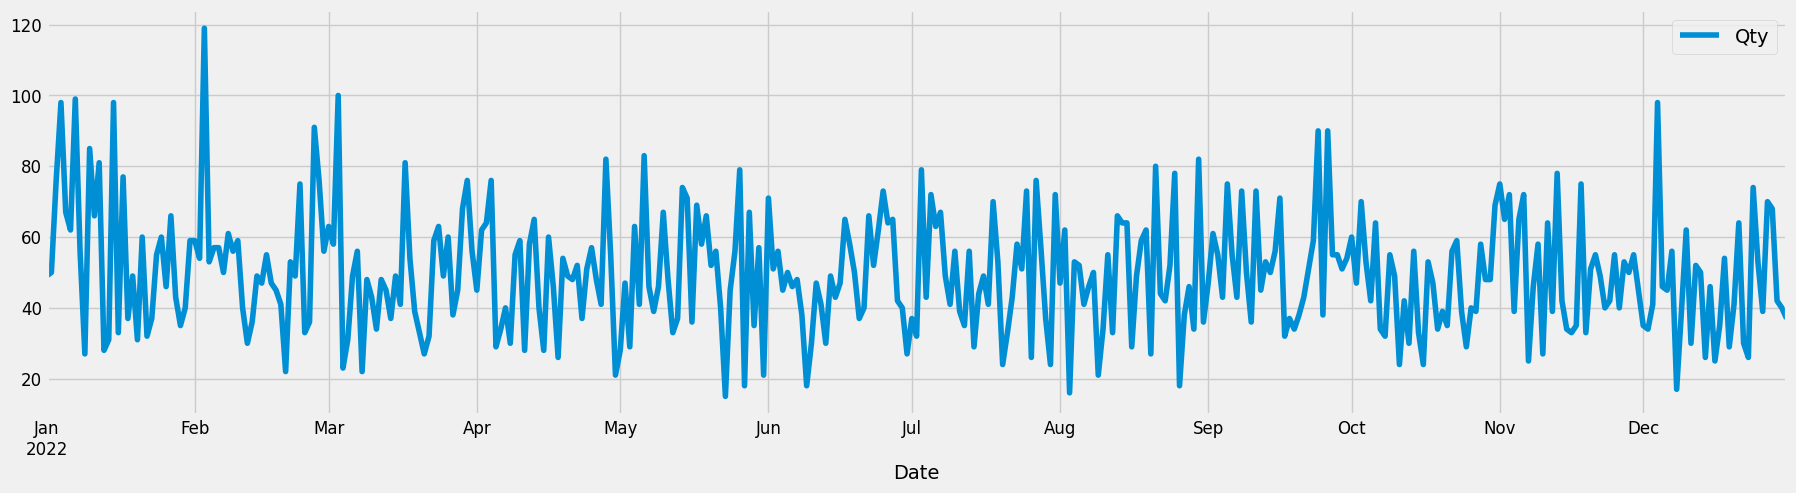

In [ ]:
df_daily.plot(figsize=(20, 5))
plt.show()

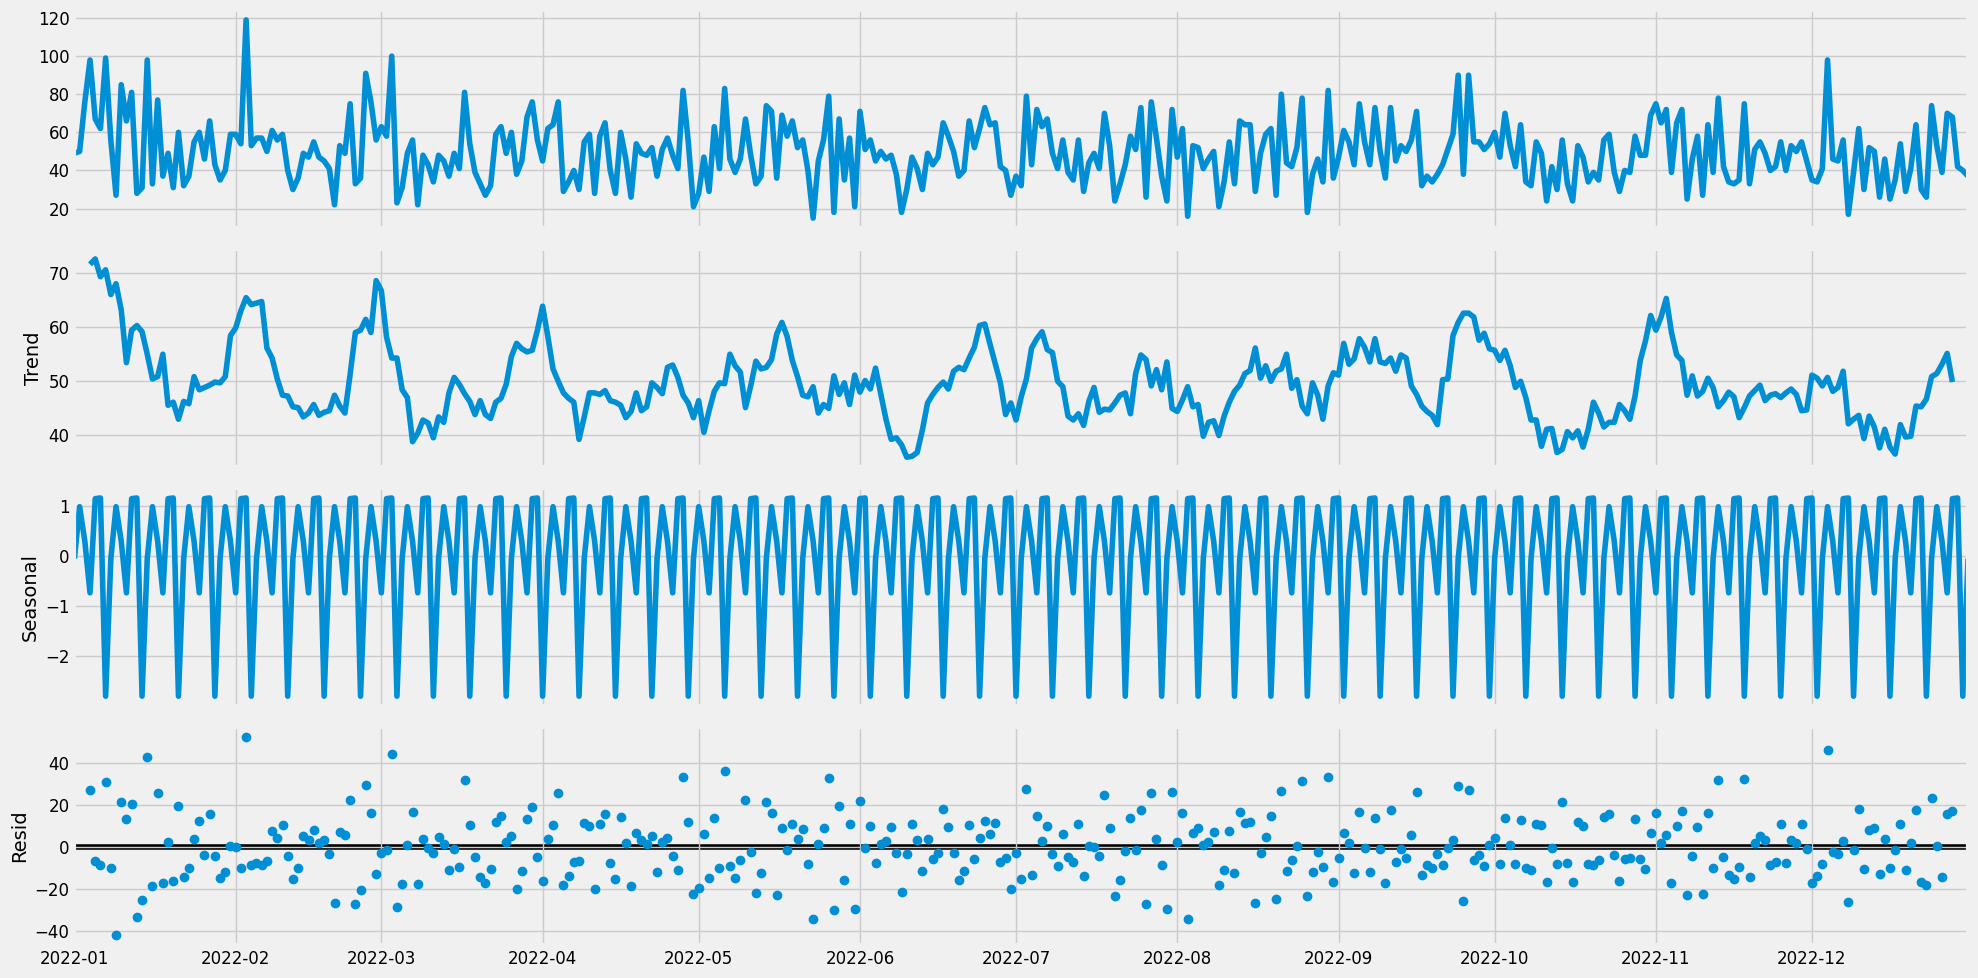

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(df_daily, model='additive')
fig = decomposition.plot()
plt.show()


From plots above, the seasonal trend repeats every seventh order (7 Days/ Weekly).

In [ ]:
# Defining data test size
test_ratio = 0.2

# Setting data limit
limit = round(df_daily.shape[0] * test_ratio)

# Divide data train and test
df_train = df_daily[:-limit]
df_test = df_daily[-limit:]

# Re-checking shape of data train and test
print(df_train.shape, df_test.shape)

(292, 1) (73, 1)


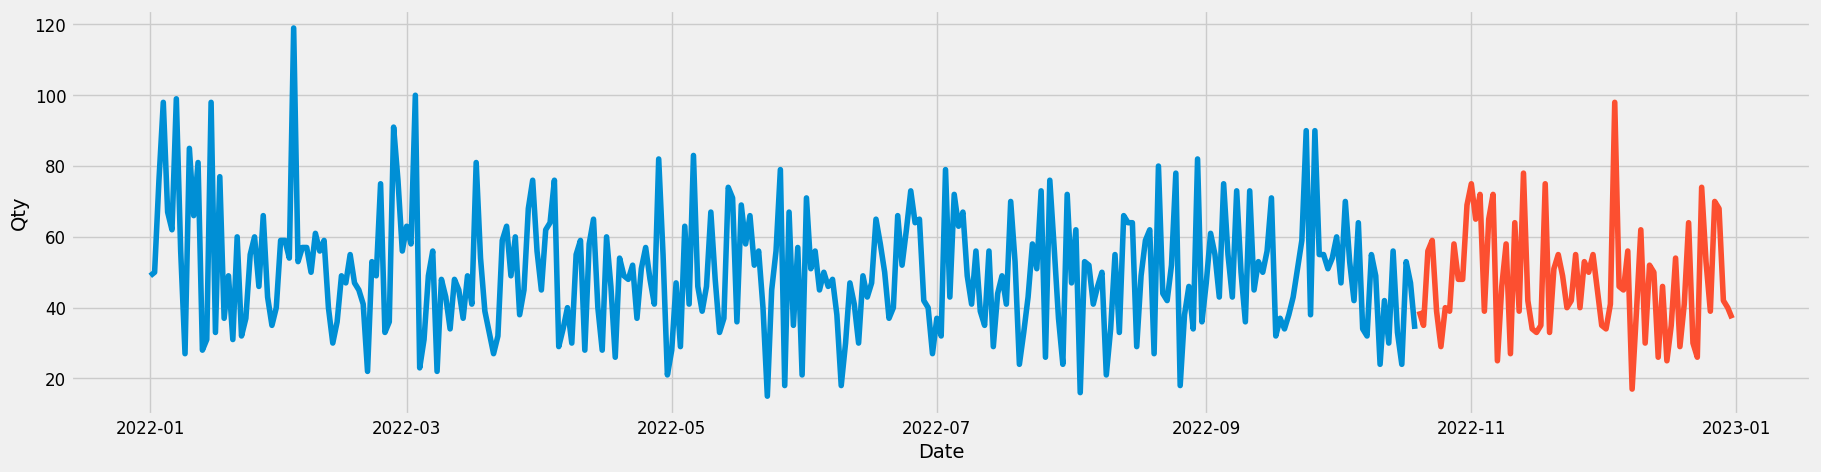

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_train, x='Date', y='Qty')
sns.lineplot(data=df_test, x='Date', y='Qty')

plt.show()

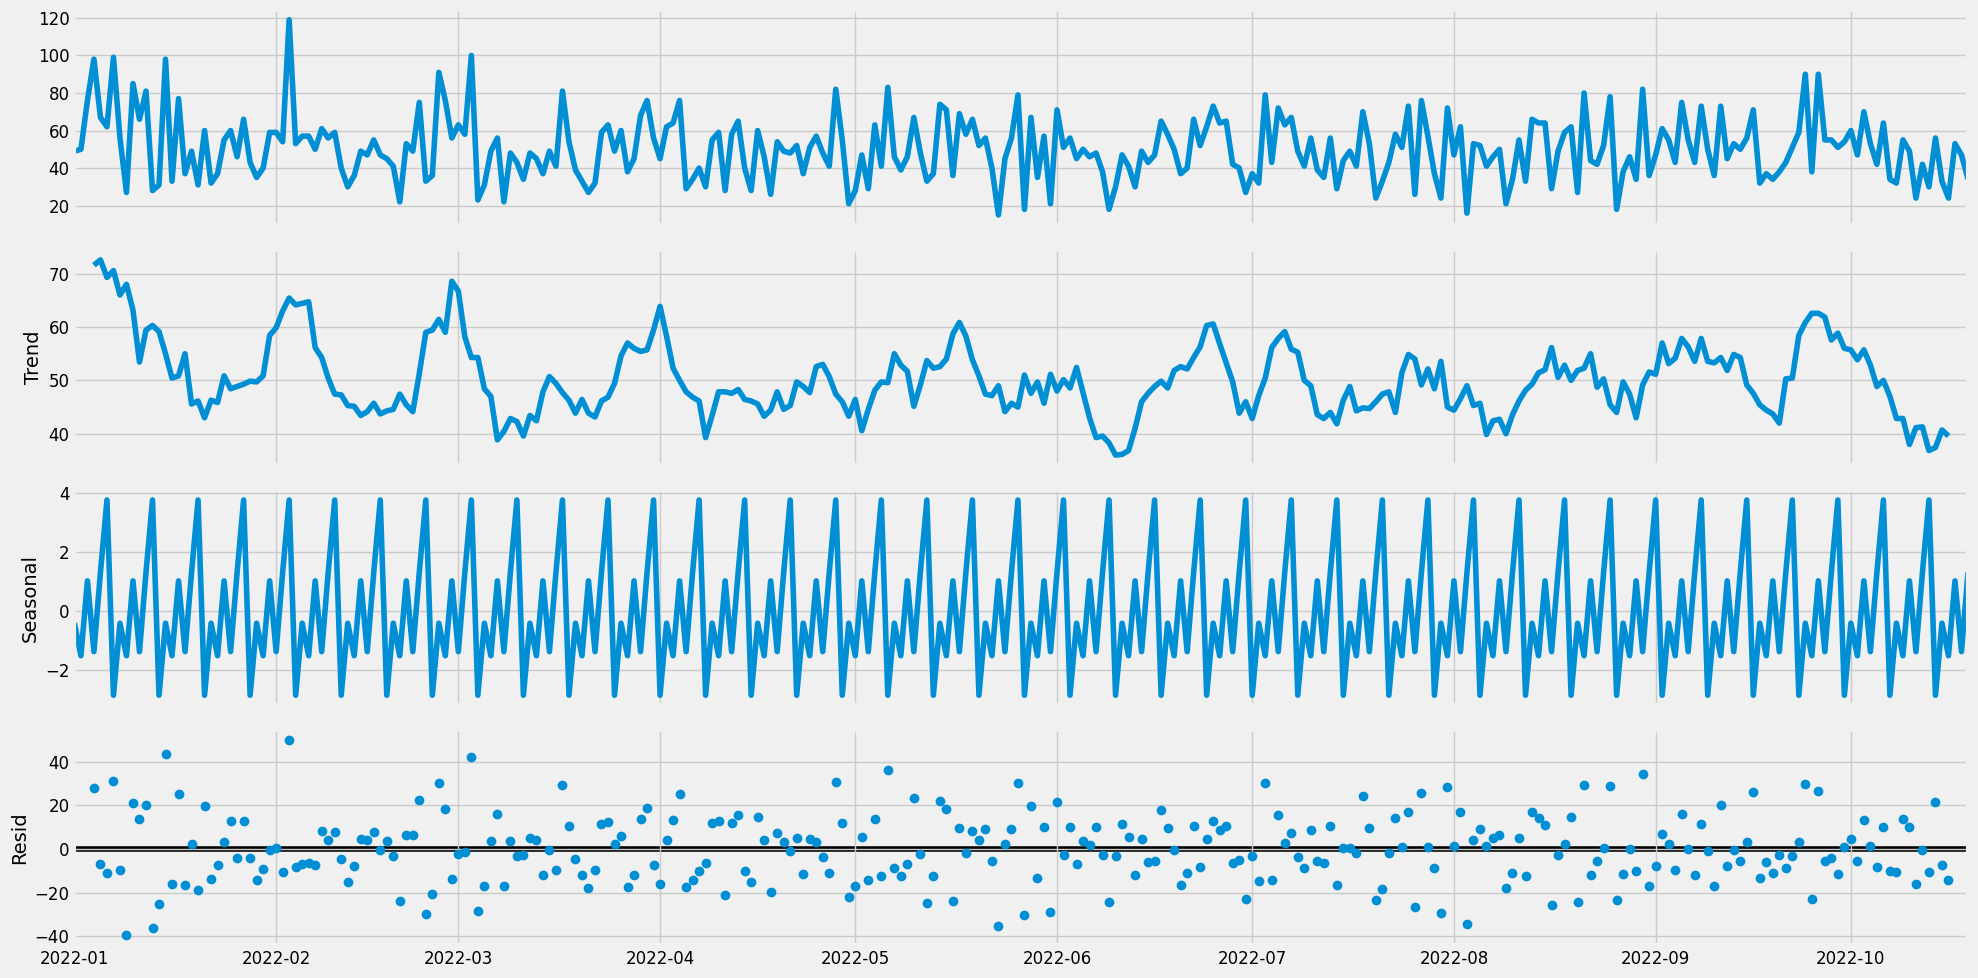

In [ ]:
# Decomposition plot data train
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(df_train, model='a')
fig = decomposition.plot()
plt.show()

In [ ]:
# Checking for stationarity using adfuller test
# H0 = data is not stationary
# H1 = data is stationary

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -17.007970
p-value: 0.000000


The p-value obtained from the test is less than the significance level (0.05), so the null hypothesis is rejected and we can conclude that the data is stationary.

But according to seasonal plot observation, the seasonal data is not stationary.

In [ ]:
df_traindiff = df_train['Qty'].diff(periods=7)
df_traindiff.head(10)

Date
2022-01-01     NaN
2022-01-02     NaN
2022-01-03     NaN
2022-01-04     NaN
2022-01-05     NaN
2022-01-06     NaN
2022-01-07     NaN
2022-01-08     7.0
2022-01-09   -23.0
2022-01-10     9.0
Name: Qty, dtype: float64

In [ ]:
# Checking for stationarity using adfuller test
# H0 = data is not stationary
# H1 = data is stationary

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_traindiff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.389324
p-value: 0.000000


The p-value obtained from the test is less than the significance level (0.05), so the null hypothesis is rejected and we can conclude that the data is stationary.


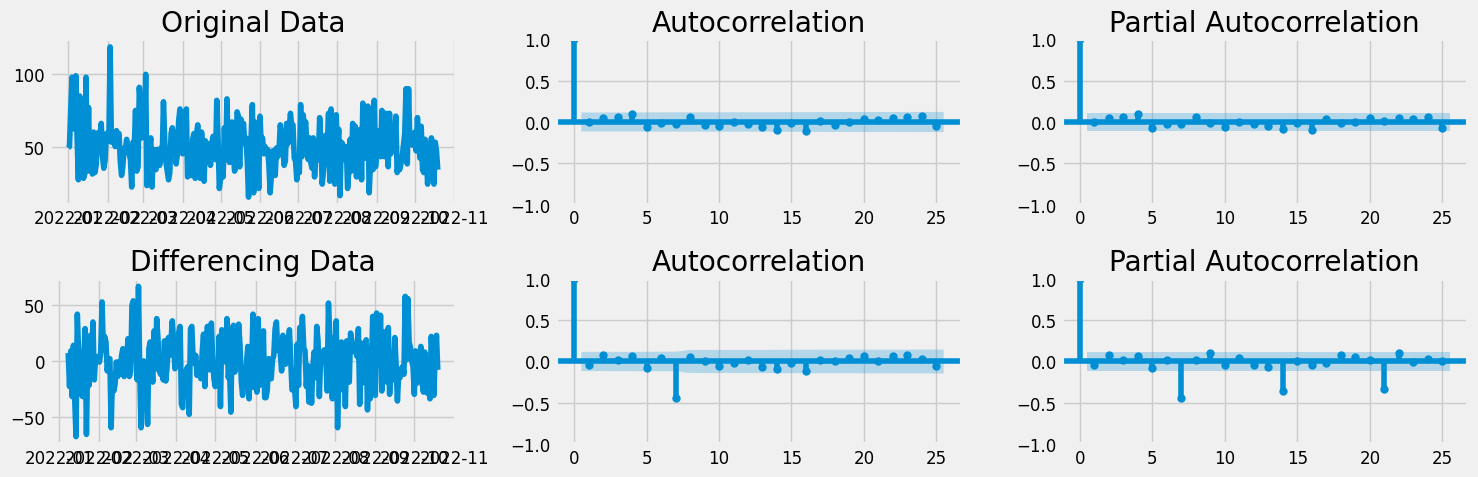

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, ax = plt.subplots(2, 3, figsize=(15,5))

# Plotting original data
ax[0,0].plot(df_train['Qty'])
ax[0,0].set_title('Original Data')

# Plotting ACF and PACF
plot_acf(df_train.dropna(), ax=ax[0,1])
plot_pacf(df_train.dropna(), ax=ax[0,2])

# Plotting differencing data
ax[1,0].plot(df_traindiff)
ax[1,0].set_title('Differencing Data')

# Plotting ACF and PACF
plot_acf(df_traindiff.dropna(), ax=ax[1,1])
plot_pacf(df_traindiff.dropna(), ax=ax[1,2])


plt.tight_layout()

The seasonal arima model formed from the plots above is (0,0,0) with seasonal (0,1,1,7). However, we will also check the MA=1 and/or AR=1 combined models, so the models that might be formed are seasonal models (0,1,1,7), (1,1,0,7), or (1 ,1,1,7).

In [ ]:
# Fit ARIMA(0,0,0)(0,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (0,1,1,7)
mod1 = sm.tsa.SARIMAX(df_train['Qty'], order=order, seasonal_order=seasonal_order)
fit_mod1 = mod1.fit()
print(fit_mod1.summary())

                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Observations:                  292
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood               -1224.854
Date:                   Wed, 13 Sep 2023   AIC                           2453.709
Time:                           07:42:55   BIC                           2461.014
Sample:                       01-01-2022   HQIC                          2456.637
                            - 10-19-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.9351      0.040    -23.304      0.000      -1.014      -0.856
sigma2       300.8664     24.687     12.187      0.000     252.480     349.253
Ljung-Box (L1) (Q):         

Significance parameter (ma.S.L7) P value less than 0.05, therefore significant.
Residual assumptions on time series model:

Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.
Residual normal distribution test (Jarque-Bera (JB)) prob value less than 0.05, hence not normally distributed.
Residual assumptions not meet.

In [ ]:
# Fit ARIMA(0,0,0)(1,1,1,7) seasonal model
order = (0,0,0)
seasonal_order = (1,1,1,7)
mod2 = sm.tsa.SARIMAX(df_train['Qty'], order=order, seasonal_order=seasonal_order)
fit_mod2 = mod2.fit()
print(fit_mod2.summary())

                                 SARIMAX Results                                 
Dep. Variable:                       Qty   No. Observations:                  292
Model:             SARIMAX(1, 1, [1], 7)   Log Likelihood               -1224.554
Date:                   Wed, 13 Sep 2023   AIC                           2455.107
Time:                           07:42:56   BIC                           2466.065
Sample:                       01-01-2022   HQIC                          2459.500
                            - 10-19-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.0524      0.065     -0.802      0.422      -0.180       0.076
ma.S.L7       -0.9224      0.041    -22.522      0.000      -1.003      -0.842
sigma2       300.8083     24



*   Significance parameter (ma.S.L7) P value less than 0.05, therefore significant.

Residual assumptions on time series model:

*   Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.
*   Residual normal distribution test (Jarque-Bera (JB)) prob value less than 0.05, hence not normally distributed.


Residual assumptions not meet.

In [ ]:
# Fit ARIMA(0,0,0)(1,1,0,7) seasonal model
order = (0,0,0)
seasonal_order = (1,1,0,7)
mod3 = sm.tsa.SARIMAX(df_train['Qty'], order=order, seasonal_order=seasonal_order)
fit_mod3 = mod3.fit()
print(fit_mod3.summary())

                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observations:                  292
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood               -1276.590
Date:                 Wed, 13 Sep 2023   AIC                           2557.179
Time:                         07:42:56   BIC                           2564.484
Sample:                     01-01-2022   HQIC                          2560.108
                          - 10-19-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.4658      0.051     -9.108      0.000      -0.566      -0.366
sigma2       452.4552     37.829     11.961      0.000     378.312     526.598
Ljung-Box (L1) (Q):                   0.08  

Significance parameter P value less than 0.05, therefore significant.

Residual assumptions on time series model:



*   Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.
*   Residual normal distribution test (Jarque-Bera (JB)) prob value more than 0.05, hence normally distributed.

*   Heteroskedasticity prob value more than 0.05, hence all residuals has a constant variance (homoscedastic).




Residual assumptions meet.

In [ ]:
!pip install pmdarima


In [ ]:
from pmdarima.arima import auto_arima

mod_aa1 = auto_arima(df_train, start_p=0, start_q=0,
                      test='adf',
                      max_p=0, max_q=0,
                      m=7,
                      seasonal=True,
                      stationary=False,
                      start_P=0,
                      max_P=1,
                      D=1,
                      max_D=1,
                      start_Q=0,
                      max_Q=1,
                      trace=True,
                      seasonal_test='ocsb',
                      scoring='mse',
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2623.538, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=2558.653, Time=0.42 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.77 sec

Best model:  ARIMA(0,0,0)(1,1,0)[7] intercept
Total fit time: 1.564 seconds


Auto-Arima automatically discover the optimal order for an ARIMA model. The best model from auto-arima is the same order as model mod3 before.

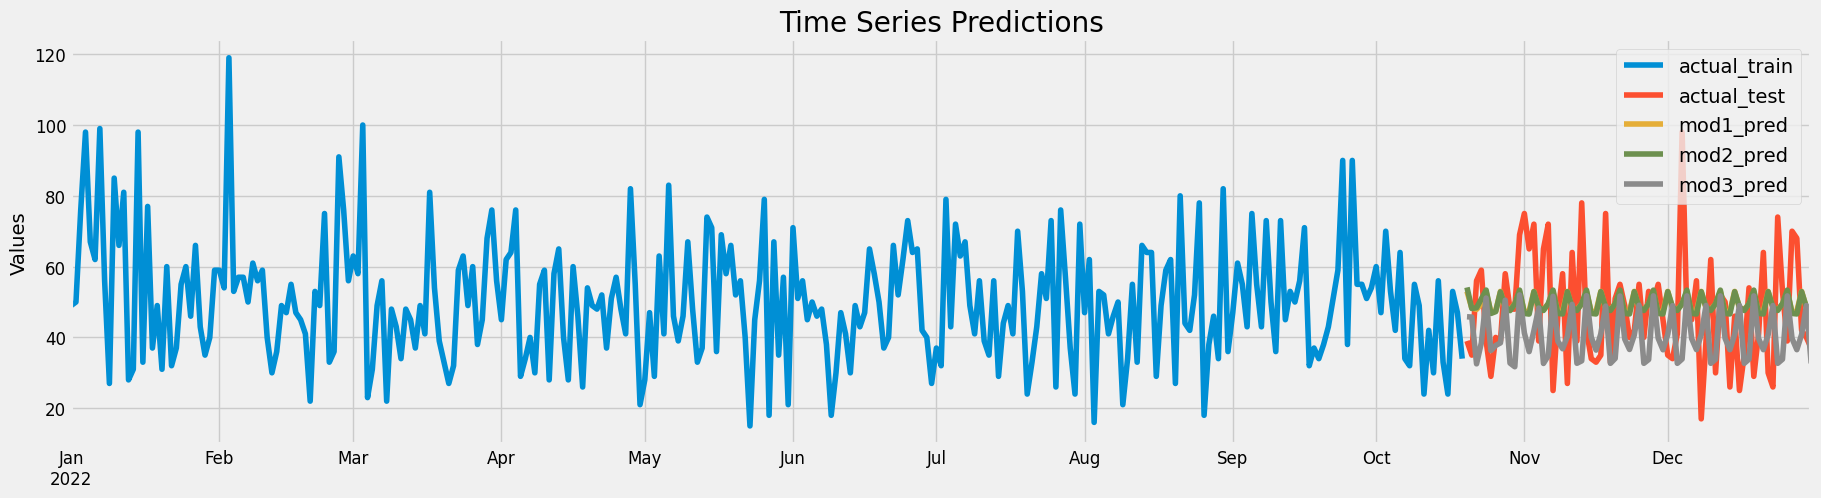

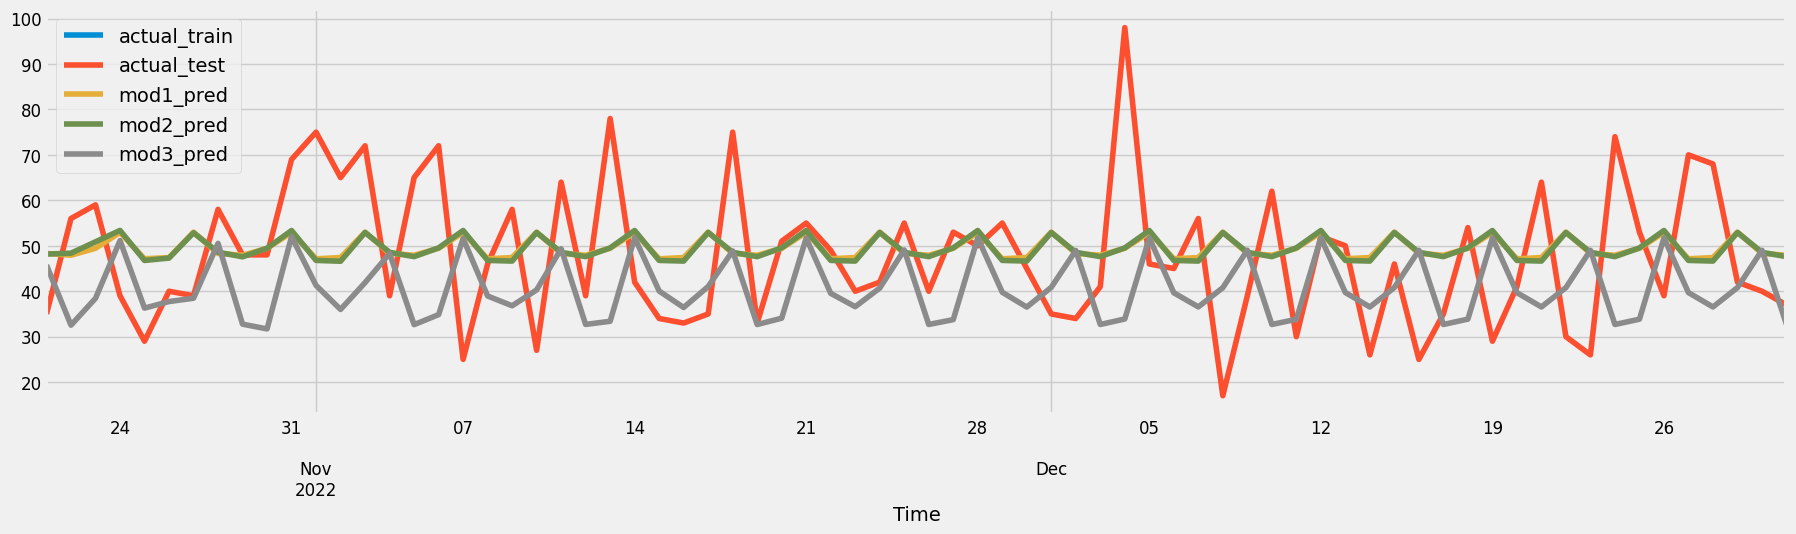

In [ ]:
# Predictions
mod1_pred = fit_mod1.predict(start=len(df_train), end=len(df_daily)-1)
mod2_pred = fit_mod2.predict(start=len(df_train), end=len(df_daily)-1)
mod3_pred = fit_mod3.predict(start=len(df_train), end=len(df_daily)-1)

# Create a DataFrame for plotting
df_pred = pd.DataFrame({
    'actual_train': df_train['Qty'],
    'actual_test': df_test['Qty'],
    'mod1_pred': mod1_pred,
    'mod2_pred': mod2_pred,
    'mod3_pred': mod3_pred,
})

# Plotting predictions
df_pred.plot(figsize=(20, 5))
plt.title('Time Series Predictions')
plt.ylabel('Values')

df_pred[len(df_train)+1 :].plot(figsize=(20, 5))
plt.xlabel('Time')

plt.show()

From the plot above, we can see roughly that the green line is closer to the actual line.

In [ ]:
# Defining metric evaluations function
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def calculate_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    mape = mean_absolute_percentage_error(true_values, predicted_values)
    return mae, mse, mape

In [ ]:
# Calculating evaluation metrics
true_values = df_test['Qty']
models = {
  'mod1_pred': mod1_pred,
  'mod2_pred': mod2_pred,
  'mod3_pred': mod3_pred
}

for name, mod in models.items():
  metrics = calculate_metrics(true_values, mod)
  print(f"Evaluation {name}: MAE({metrics[0]}), MSE({metrics[1]}), MAPE({metrics[2]})")

Evaluation mod1_pred: MAE(13.394039615360962), MSE(262.552316403533), MAPE(0.33016027790527874)
Evaluation mod2_pred: MAE(13.408869323111276), MSE(264.02772990670064), MAPE(0.330094280951323)
Evaluation mod3_pred: MAE(14.898357176447595), MSE(370.58465634132176), MAPE(0.31317598904994004)


The mod1_pred and mod2_pred both have lowest MAE and MSE, but the residual assumptions are not meet.

The mod3_pred ARIMA model with p,d,q = (0,0,0)(1,1,0,7) is the best performance compared to the other models.

In [ ]:
# Fit ARIMA(0,0,0)(1,1,0,7) seasonal model
order = (0,0,0)
seasonal_order = (1,1,0,7)
best = sm.tsa.SARIMAX(df_test['Qty'], order=order, seasonal_order=seasonal_order)
fit_best = best.fit()
print(fit_best.summary())

                                SARIMAX Results                                
Dep. Variable:                     Qty   No. Observations:                   73
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood                -288.259
Date:                 Wed, 13 Sep 2023   AIC                            580.518
Time:                         07:43:36   BIC                            584.897
Sample:                     10-20-2022   HQIC                           582.249
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.5633      0.101     -5.581      0.000      -0.761      -0.365
sigma2       349.5805     75.340      4.640      0.000     201.917     497.244
Ljung-Box (L1) (Q):                   0.01  


Residual assumptions on time series model:


*   Significance parameter P value less than 0.05, therefore significant.
*   Residual white noise test (Ljung-Box) prob value more than 0.05, therefore residual is white noise.


*   Residual normal distribution test (Jarque-Bera (JB)) prob value more than 0.05, hence normally distributed.
*   Heteroskedasticity prob value more than 0.05, hence all residuals has a constant variance (homoscedastic)

Residual assumptions meet.







.

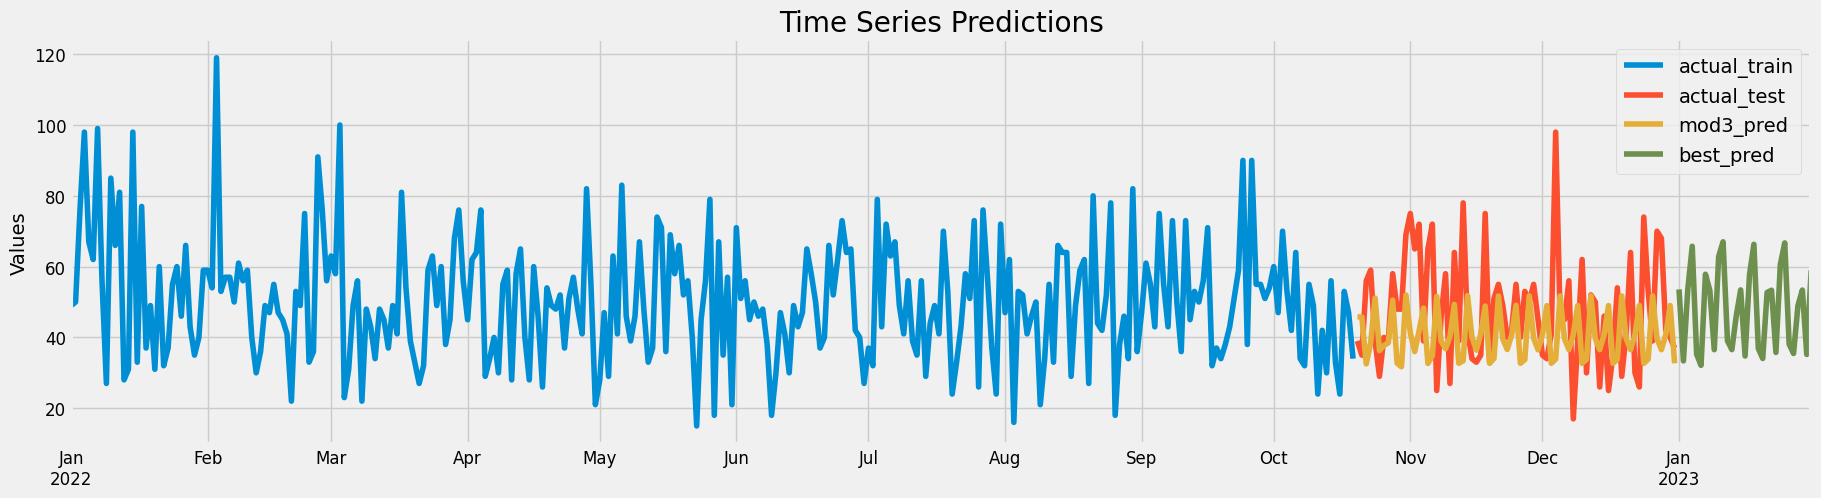

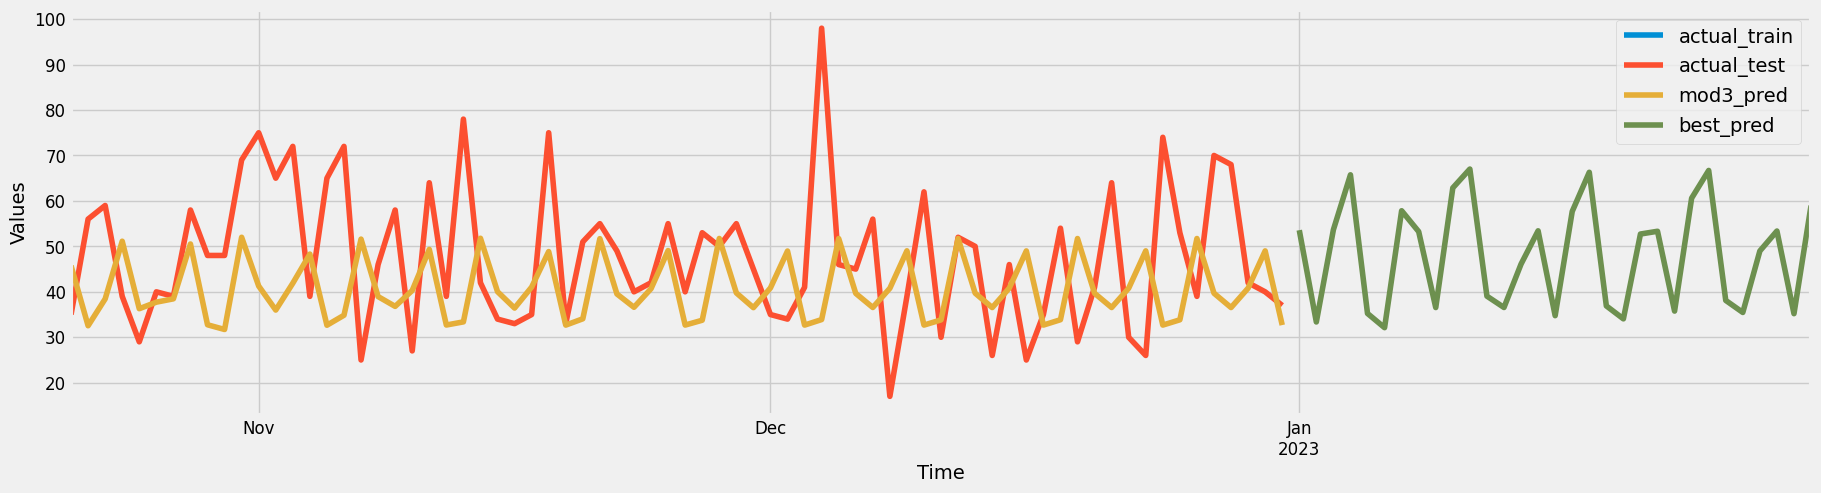

In [ ]:
best_pred = fit_best.forecast(steps=31)

# Create a DataFrame for plotting
df_pred = pd.DataFrame({
    'actual_train': df_train['Qty'],
    'actual_test': df_test['Qty'],
    'mod3_pred': mod3_pred,
    'best_pred': best_pred
})

# Plotting predictions
df_pred.plot(figsize=(20, 5))
plt.title('Time Series Predictions')
plt.ylabel('Values')

df_pred[len(df_train)+1 :].plot(figsize=(20, 5))
plt.xlabel('Time')
plt.ylabel('Values')

plt.show()

In [ ]:
best_pred

2023-01-01    53.563317
2023-01-02    33.366830
2023-01-03    53.663807
2023-01-04    65.746732
2023-01-05    35.240196
2023-01-06    32.113562
2023-01-07    57.842729
2023-01-08    53.245991
2023-01-09    36.540090
2023-01-10    62.866262
2023-01-11    67.016036
2023-01-12    39.048109
2023-01-13    36.556127
2023-01-14    46.101665
2023-01-15    53.424746
2023-01-16    34.752539
2023-01-17    57.682363
2023-01-18    66.301016
2023-01-19    36.903047
2023-01-20    34.053554
2023-01-21    52.715606
2023-01-22    53.324050
2023-01-23    35.759497
2023-01-24    60.602541
2023-01-25    66.703799
2023-01-26    38.111396
2023-01-27    35.463296
2023-01-28    48.989861
2023-01-29    53.380774
2023-01-30    35.192260
2023-01-31    58.957555
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
# Display information of predicted quantity values in January 2023
df_jan23 = pd.DataFrame(data=best_pred)
df_jan23.describe()

,predicted_mean
count,31.000000
mean,48.233205
std,11.955421
min,32.113562
25%,36.149794
50%,52.715606
75%,57.762546
max,67.016036


In [ ]:
# Sum of predicted quantity needed in January 2023
df_jan23.agg({'predicted_mean':'sum'})

predicted_mean    1495.229354
dtype: float64

##CUSTOMER SEGMENTATION - CLUSTERING##

In [ ]:
# Creating new dataframe for clustering
df_cluster = df_merge.groupby(['CustomerID']).agg({'TransactionID':'count',
                                          'Qty':'sum',
                                          'TotalAmount':'sum'}).reset_index()

In [ ]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler
cln = MinMaxScaler().fit_transform(df_cluster)
df_clusterN = pd.DataFrame(cln, columns=df_cluster.columns)
df_clusterN.describe()

,CustomerID,TransactionID,Qty,TotalAmount
count,444.000000,444.000000,444.000000,444.000000
mean,0.499005,0.455956,0.446697,0.357197
std,0.288062,0.180164,0.184405,0.165116
min,0.000000,0.000000,0.000000,0.000000
25%,0.250561,0.333333,0.318841,0.236649
50%,0.498879,0.444444,0.434783,0.346011
75%,0.747197,0.555556,0.579710,0.460708
max,1.000000,1.000000,1.000000,1.000000


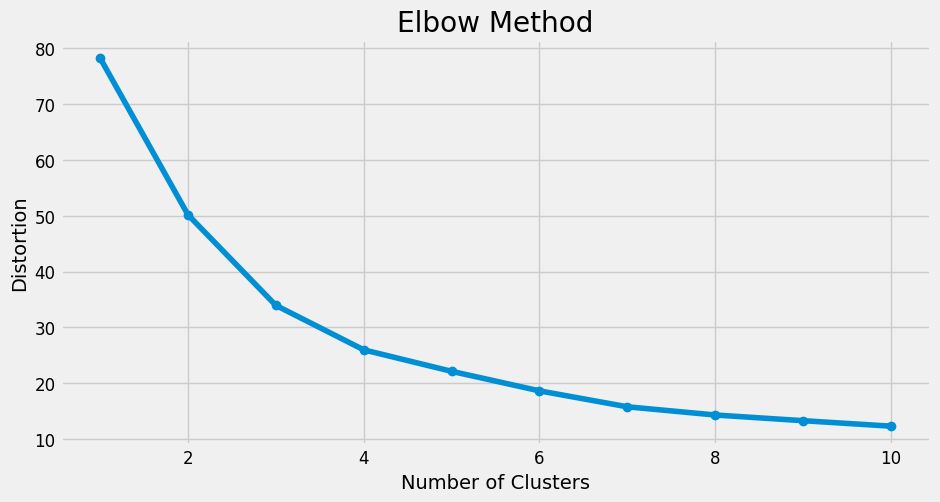

In [ ]:
# Create function for determining number of optimum cluster k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_k_elbow(data, max_k):
    distortions = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.style.use('ggplot')
    plt.show()

# Determining number of optimum cluster
data = df_clusterN
max_k = 10
find_optimal_k_elbow(data, max_k)

For n_clusters = 2 The average silhouette_score is : 0.3341105933535229
For n_clusters = 3 The average silhouette_score is : 0.33905486539278945
For n_clusters = 4 The average silhouette_score is : 0.32502452834722884


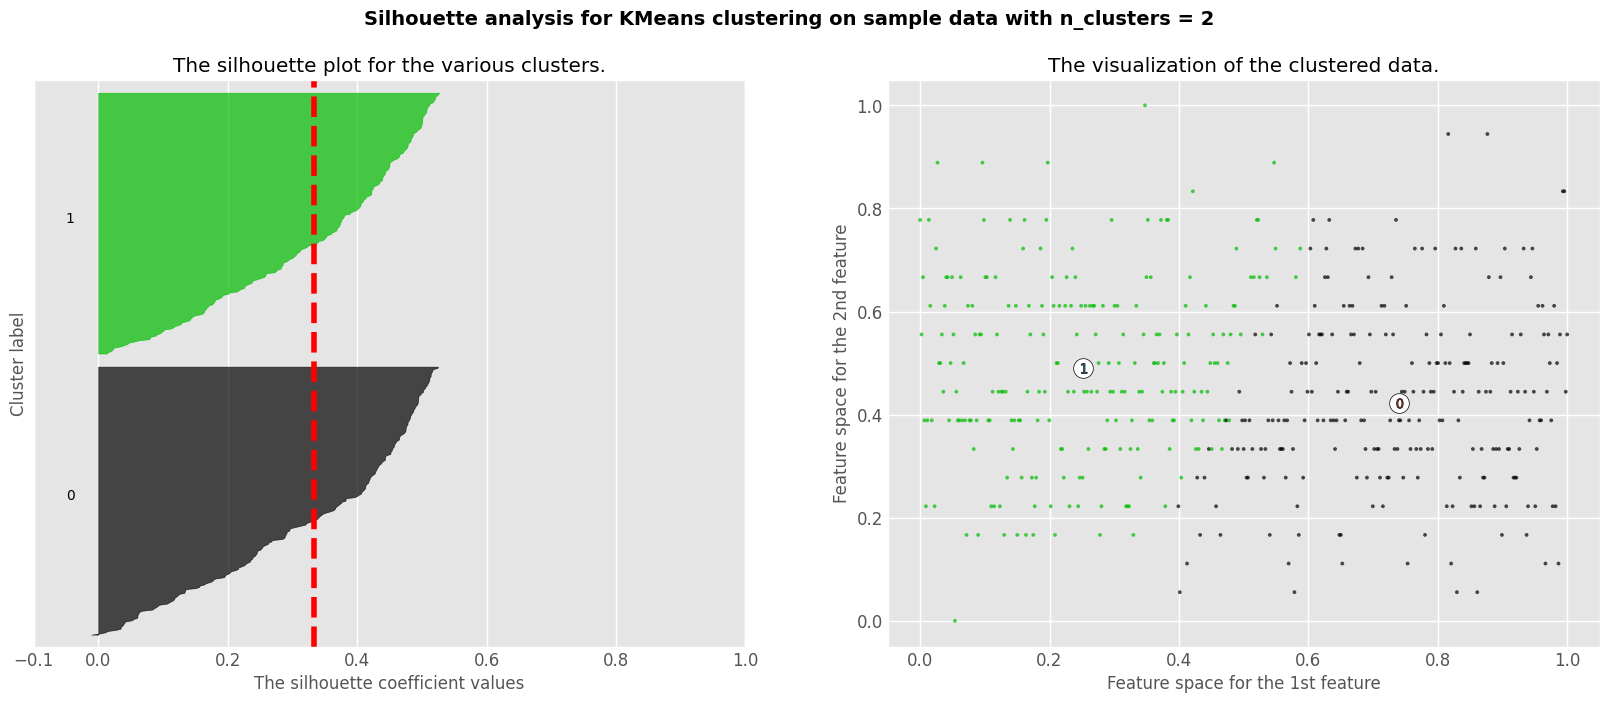

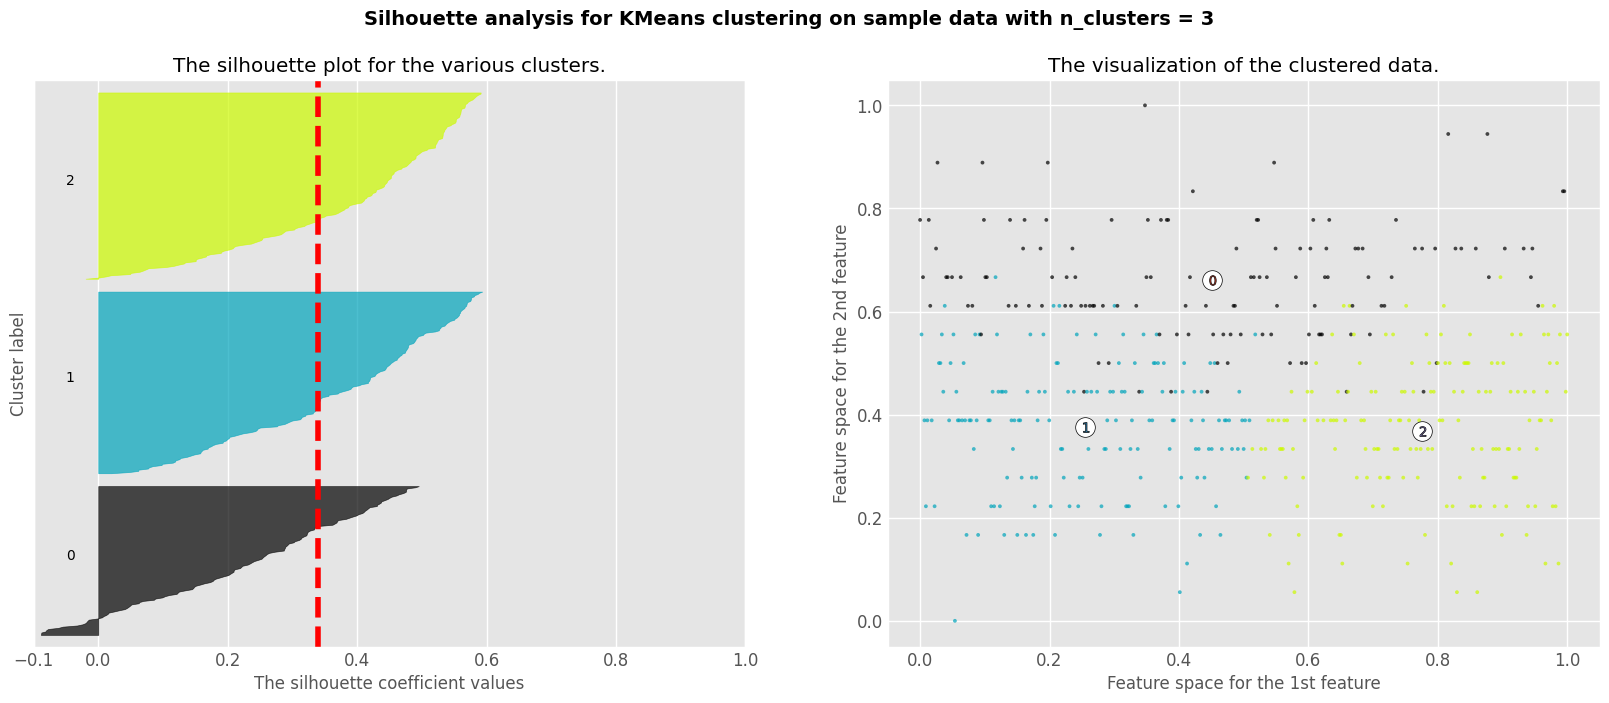

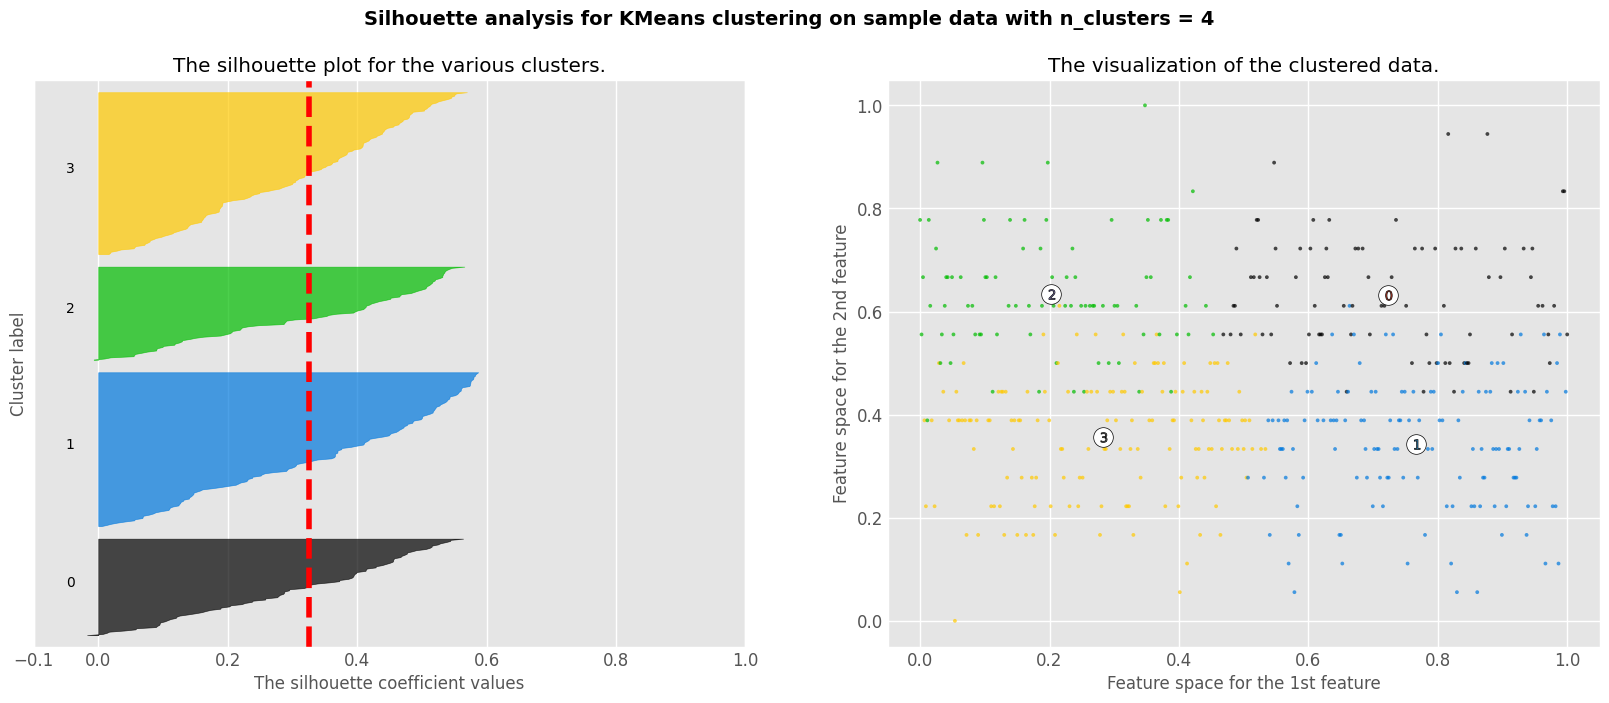

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = cln
# For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# Model fitting
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=30)
kmeans.fit(df_clusterN)

KMeans(n_clusters=3, n_init=10, random_state=30)

In [ ]:
# Appending cluster label to initial cluster dataframe
df_cluster['cluster'] = kmeans.labels_

In [ ]:
# Displaying initial dataframe with appended cluster
df_cluster.sample(5)

,CustomerID,TransactionID,Qty,TotalAmount,cluster
168,170,7,22,235300,1
421,424,11,51,463800,2
209,211,10,40,317800,1
232,234,17,51,502900,0
424,427,14,55,574800,0


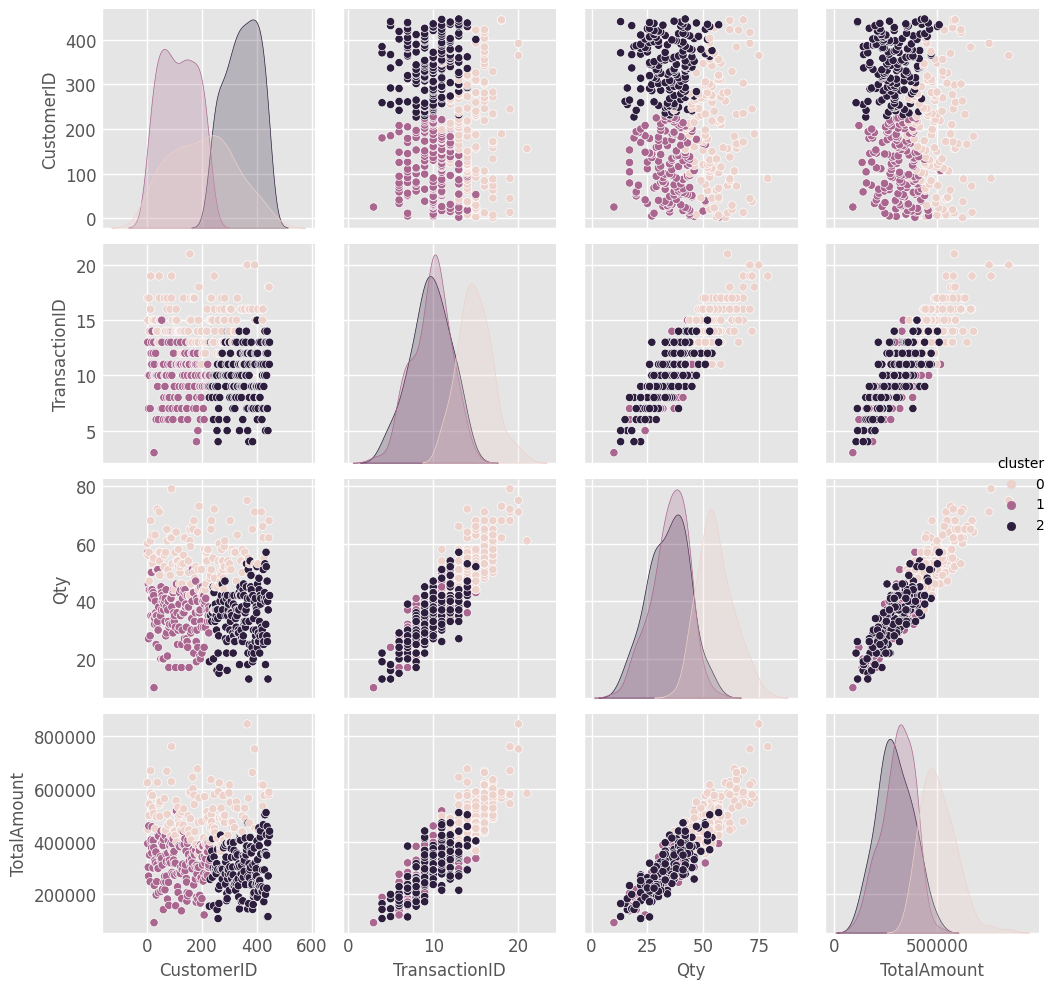

In [ ]:
# Visualizing cluster
sns.pairplot(data=df_cluster, diag_kind='kde', hue='cluster')
plt.tight_layout()

In [ ]:
# Grouping data by cluster
df_clustered = df_cluster.groupby(['cluster']).agg({ 'TransactionID' : 'mean',
                                       'Qty' : 'mean',
                                       'TotalAmount' : 'mean'
                                }).T
df_clustered

cluster,0,1,2
TransactionID,14.883721,9.740260,9.664596
Qty,55.596899,35.129870,34.428571
TotalAmount,505739.534884,309962.337662,295615.527950


Business Recommendation
From clusters formed above, marketing team could carry out personalized marketing strategies based on the characteristics of each customer segment as follows:


1.   Cluster 1: Regular Customer

Encourage customers to spend more by promoting bundles of related products they've purchased before.
Recommend products based on their past buying behavior to spark interest in new categories.

2.   Cluster 0: Mid-Level Customer

Develop membership programs that reward frequent transactions, encouraging to continue purchasing regularly.
Personalized recommendations to new products or upsell complementary items.

3.   Cluster 2: High-Level Customer

Create exclusive programs in membership, offering unique benefits and access to limited-edition products.
Offer early access to new product launches or exclusive events to strengthen their loyalty.


